In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [4]:
df=pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [6]:
df.isnull().sum()
#No null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


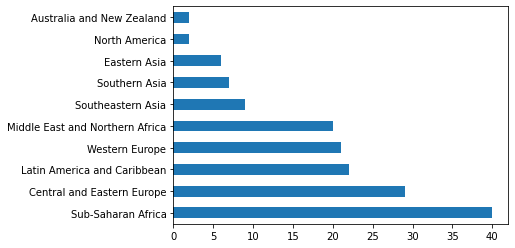

In [9]:
df['Region'].value_counts().plot(kind='barh')
print(df['Region'].value_counts())
#observe the region distribution of the various countries 

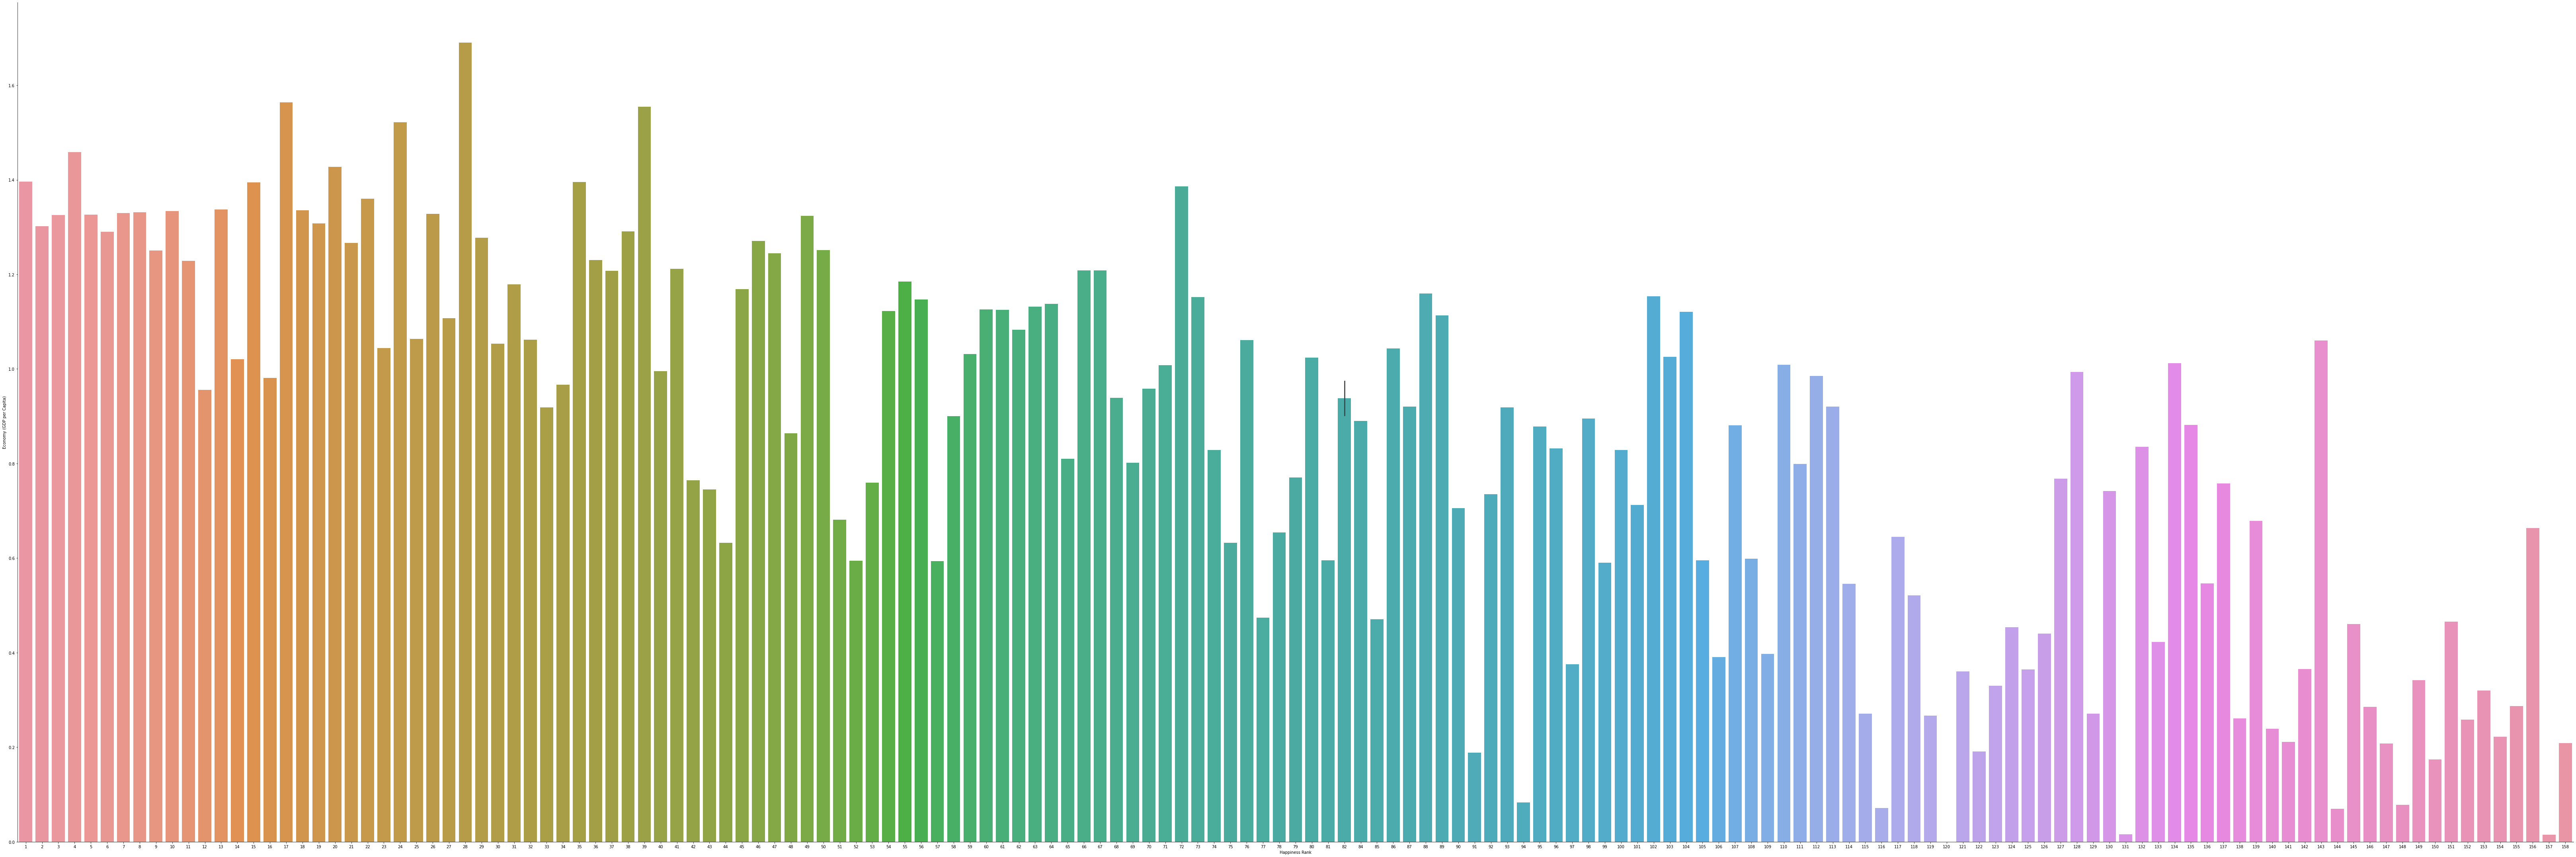

In [10]:
sns.catplot(x="Happiness Rank", y="Economy (GDP per Capita)", data=df, height=30,aspect=3,kind="bar")
#We can observe that higher GDP Generally have higher happiness rank,resembeks a positive corelation

(array([ 7., 17., 14., 14., 19., 24., 26., 26.,  7.,  4.]),
 array([0.      , 0.169042, 0.338084, 0.507126, 0.676168, 0.84521 ,
        1.014252, 1.183294, 1.352336, 1.521378, 1.69042 ]),
 <a list of 10 Patch objects>)

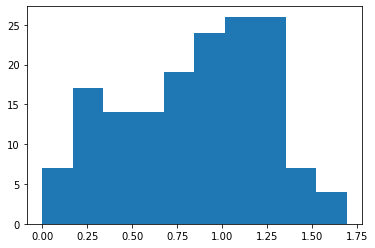

In [14]:
plt.hist(df['Economy (GDP per Capita)'], 10)

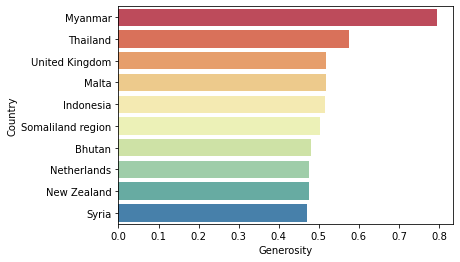

In [15]:
sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),palette='Spectral')

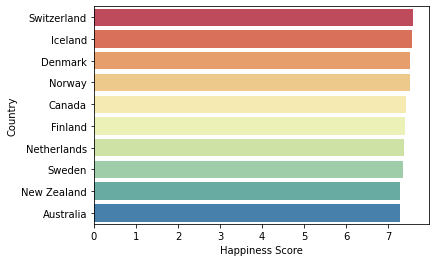

In [16]:
sns.barplot(x='Happiness Score' ,y='Country',data=df.nlargest(10,'Happiness Score'),palette='Spectral')

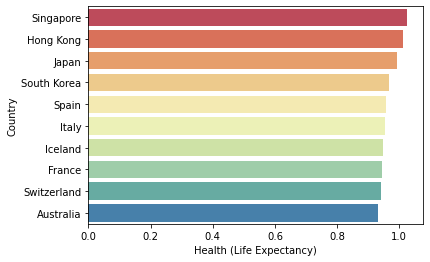

In [17]:
sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),palette='Spectral')

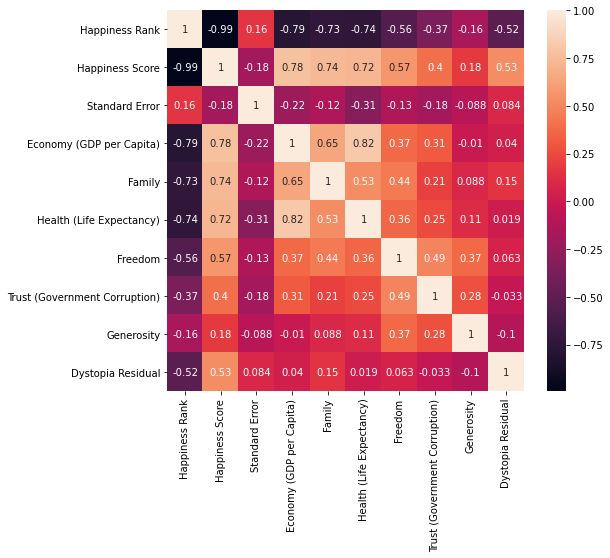

In [18]:
corr_hmap= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()
#we can observe that happiness score has high correlation with "Economy (GDP per Capita)","Family","Health (Life Expectancy)"

In [19]:
df.loc[df['Country']=='India']
#India's Happiness Rank is 117 with 4.565 Score

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


Text(0.5, 1.0, 'Life Expectancy vs Happiness Score in 2015')

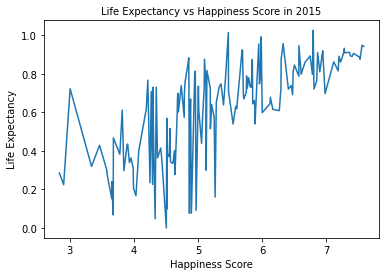

In [21]:
plt.plot(df['Happiness Score'], df['Health (Life Expectancy)'])
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Happiness Score in 2015', fontsize = 10)

Life expectancy is higher when Happiness score is high

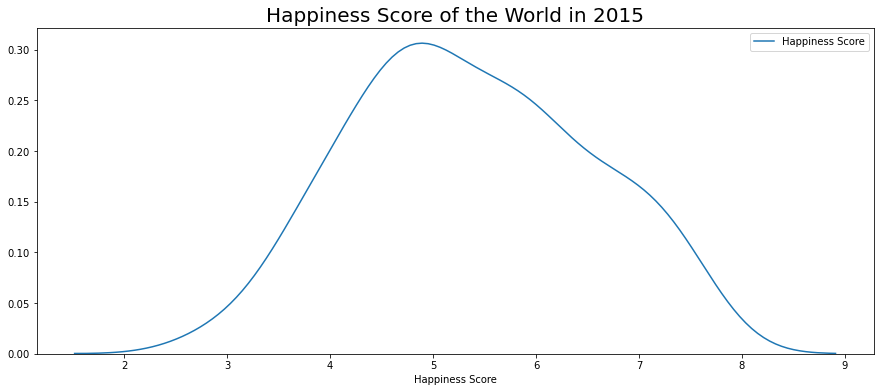

In [22]:
plt.figure(figsize = (15,6))
sns.kdeplot(df['Happiness Score'])
plt.title('Happiness Score of the World in 2015', fontsize = 20)
plt.xlabel('Happiness Score' )
plt.show()

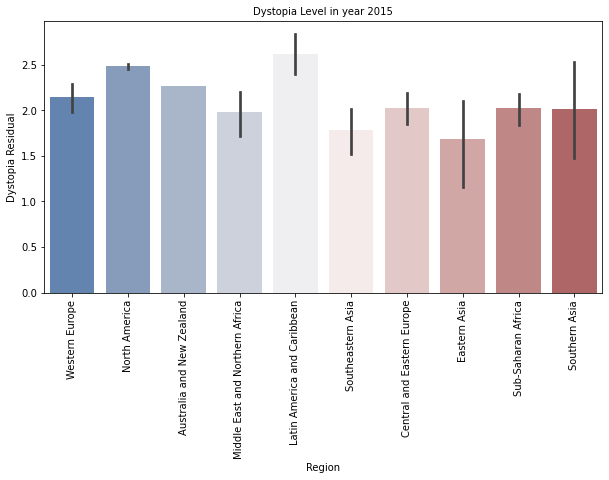

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Region', y = 'Dystopia Residual', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Dystopia Level in year 2015', fontsize = 10)
plt.show()

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width.

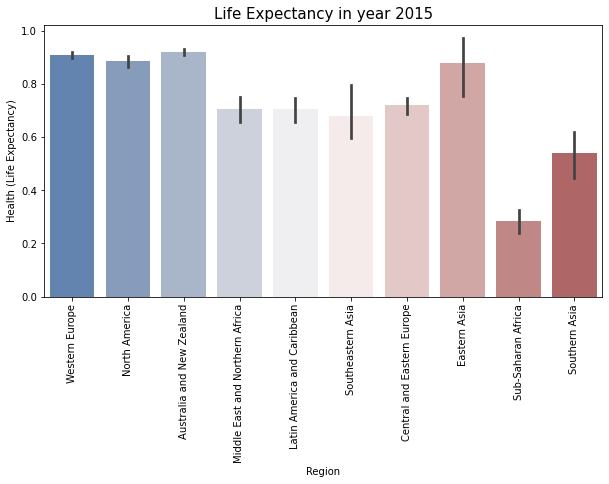

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Region', y = 'Health (Life Expectancy)', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Life Expectancy in year 2015', fontsize = 15)
plt.show()
#Sub-Saharan Africa - Has the least Life Expetancy

Text(0.5, 1.0, 'Trust (Government Corruption) vs Happiness Score in 2015')

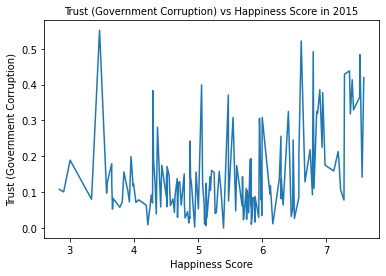

In [30]:
plt.plot(df['Happiness Score'], df['Trust (Government Corruption)'])
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.title('Trust (Government Corruption) vs Happiness Score in 2015', fontsize = 10)

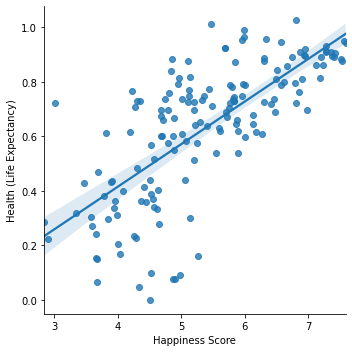

In [31]:
sns.lmplot(x='Happiness Score', y='Health (Life Expectancy)', data=df)
#health score is related positively with happiness score

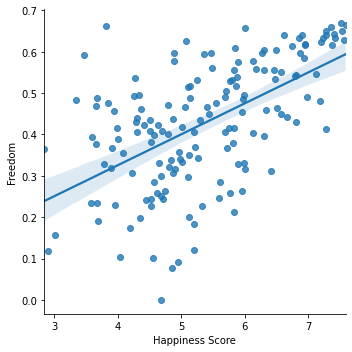

In [32]:
sns.lmplot(x='Happiness Score', y='Freedom', data=df)
#similarly freedom is also positively related

In [33]:
df.drop(["Country"],axis=1, inplace =True)
#We can drop the Column as the name of the country dosent play any role in scoring the happiness

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["Region"]] = df[["Region"]].apply(le.fit_transform)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [35]:
#we can build the model using other factors
y=df["Happiness Score"]
x=df.drop("Happiness Score", axis=1)
num_folds = 10
seed = 30
scoring = 'neg_mean_squared_error'

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [37]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 99.99999445164144
Testing r2_score is: 99.99999336270366
At random state 31 The model Perfomes very well
Training r2_score is: 99.99999442644899
Testing r2_score is: 99.9999929071592
At random state 32 The model Perfomes very well
Training r2_score is: 99.99999391844754
Testing r2_score is: 99.99999479725203
At random state 33 The model Perfomes very well
Training r2_score is: 99.99999324867173
Testing r2_score is: 99.99999653633553
At random state 34 The model Perfomes very well
Training r2_score is: 99.99999458241213
Testing r2_score is: 99.99999119485717
At random state 35 The model Perfomes very well
Training r2_score is: 99.99999465097183
Testing r2_score is: 99.99999244957472
At random state 36 The model Perfomes very well
Training r2_score is: 99.99999485012628
Testing r2_score is: 99.99999076187484
At random state 37 The model Perfomes very well
Training r2_score is: 99.9999939794331
Testing r2_score is: 99.9

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=30)

In [39]:
Lr = LinearRegression(normalize=True)
Lr.fit(x_train,y_train)
y_pred = Lr.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.9999999336270367


In [40]:
ls = Lasso()
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.1761931017022269


In [41]:
Rf = RandomForestRegressor()
Rf.fit(x_train,y_train)
y_pred = Rf.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.9965791834797798


In [42]:
rd =Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.999765591197169


In [43]:
#performance tuning
parameters={"copy_X":[True,False], "fit_intercept":[True,False], "n_jobs":[-1,None], "normalize":[False,True]}
Lr = LinearRegression()
clf=GridSearchCV(Lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}


In [44]:
Lr = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False)
Lr.fit(x_train,y_train)
Lr.score(x_train,y_train)
y_pred = Lr.predict(x_test)

Lrs = r2_score(y_test,y_pred)
print("r2 score is :",Lrs*100)

Lrscore=cross_val_score(Lr,x_t,y,cv=3)
Lrc=Lrscore.mean()
print("Cross value Score:",Lrc*100)
#r2 score is the same even after tuning

r2 score is : 99.99999336270366
Cross value Score: 99.99994679020014


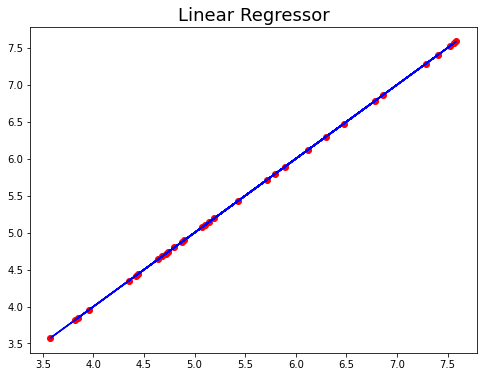

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regressor",fontsize=18)
plt.show()

In [46]:
model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1, normalize= False)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [47]:
import joblib
joblib.dump(model,"HappinessIndex.pkl")

['HappinessIndex.pkl']